# **CCNLP MINI PROJECT**

**Members:**

Kusai Hajuri - 61 (PA-22)<br>
Omkar Mahabdi - 70 (PA-21)<br>
Hrishikesh Lokhande - 83 (PA-24)<br>

**Problem Statement :** <br>Analyzing sentiment in electric vehicle (EV) reviews in India to gauge consumer perceptions and preferences.

### Installing Dependencies

In [ ]:
# Install necessary libraries
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install nltk
!pip install scikit-learn
!pip install wordcloud
!pip install spacy
!pip install textblob

# Download NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Download Spacy model
!python -m spacy download en_core_web_sm

# Download necessary packages for Spacy
!python -m spacy download en

# Download necessary packages for TextBlob
!python -m textblob.download_corpora

### Importing all the required Libraries

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Natural Language Processing libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Machine Learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Word cloud visualization library
from wordcloud import WordCloud, STOPWORDS

# Web scraping library
from bs4 import BeautifulSoup

# Natural Language Processing libraries
import spacy
import re, string, unicodedata

# Text processing library
from textblob import TextBlob
from textblob import Word

# Google Drive mounting library
from google.colab import drive
drive.mount("/content/drive")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


### Importing and Description of Data

In [11]:
data=pd.read_excel('/content/drive/MyDrive/ev-reviews-in-India.xlsx')
data.head()

In [14]:
data.describe()

,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
count,1113.000000,999.000000,969.000000,577.000000,955.000000,330.000000,742.000000,211.000000,441.000000
mean,3.577718,3.900901,3.501548,3.807626,3.340314,3.457576,3.750674,3.412322,3.362812
std,1.634148,1.307903,1.556859,1.447967,1.624755,1.627934,1.346197,1.402596,1.506011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
data.shape

(1113, 14)

### Data Preprocessing

In [15]:
data.isna().sum()

review                 47
Used it for             0
Owned for               0
Ridden for            233
rating                  0
Visual Appeal         114
Reliability           144
Performance           536
Service Experience    158
Extra Features        783
Comfort               371
Maintenance cost      902
Value for Money       672
Model Name              0
dtype: int64

<Axes: title={'center': 'Missing Values'}>

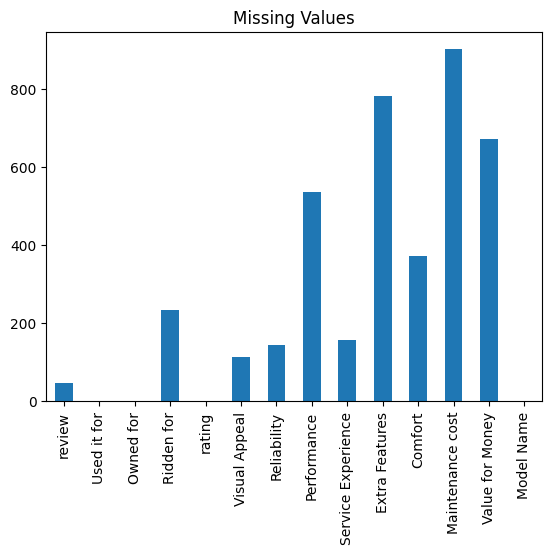

In [18]:
data.isna().sum().plot(kind='bar',title="Missing Values")

In [19]:
# Renaming columns in the data to avoid duplication of 2 columns

# Replace 'tata nexon ev' with 'Tata Nexon EV'
data['Model Name'] = data['Model Name'].replace(['tata nexon ev'], 'Tata Nexon EV')
# Replace 'tata tigor ev' with 'Tata Tigor EV'
data['Model Name'] = data['Model Name'].replace(['tata tigor ev'], 'Tata Tigor EV')

# Check the counts of each unique value in 'Model Name' column
data['Model Name'].value_counts()

Model Name
Tata Nexon EV              149
Hero Electric Flash        102
Okinawa Praise              95
Hero Electric Optima        82
hyundai kona                56
Revolt RV 400               52
PURE EV EPluto 7G           50
Hero Electric Photon        38
Tork Kratos                 38
Tata Tigor EV               35
Ather 450X                  30
OLA S1                      29
Ampere Magnus EX            28
OLA S1 Pro                  28
Ampere REO                  24
Benling Aura                22
Ampere Magnus Pro           22
PURE EV ETrance Neo         19
TVS iQube                   17
Okinawa Ridge Plus          15
Bajaj Chetak                15
Ampere Zeal                 13
MG ZS EV                    12
Bounce Infinity E1          12
Kia EV6                     12
Okinawa i-Praise            11
Techo Electra Emerge        10
Revolt RV 300               10
Hero Electric Optima CX      9
Hero Electric NYX            9
Techo Electra Raptor         9
Okinawa Lite                

In [20]:
# Rating values count
data['rating'].value_counts()

rating
5    501
1    245
4    217
3     82
2     59
0      9
Name: count, dtype: int64

### Visualization

In [21]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


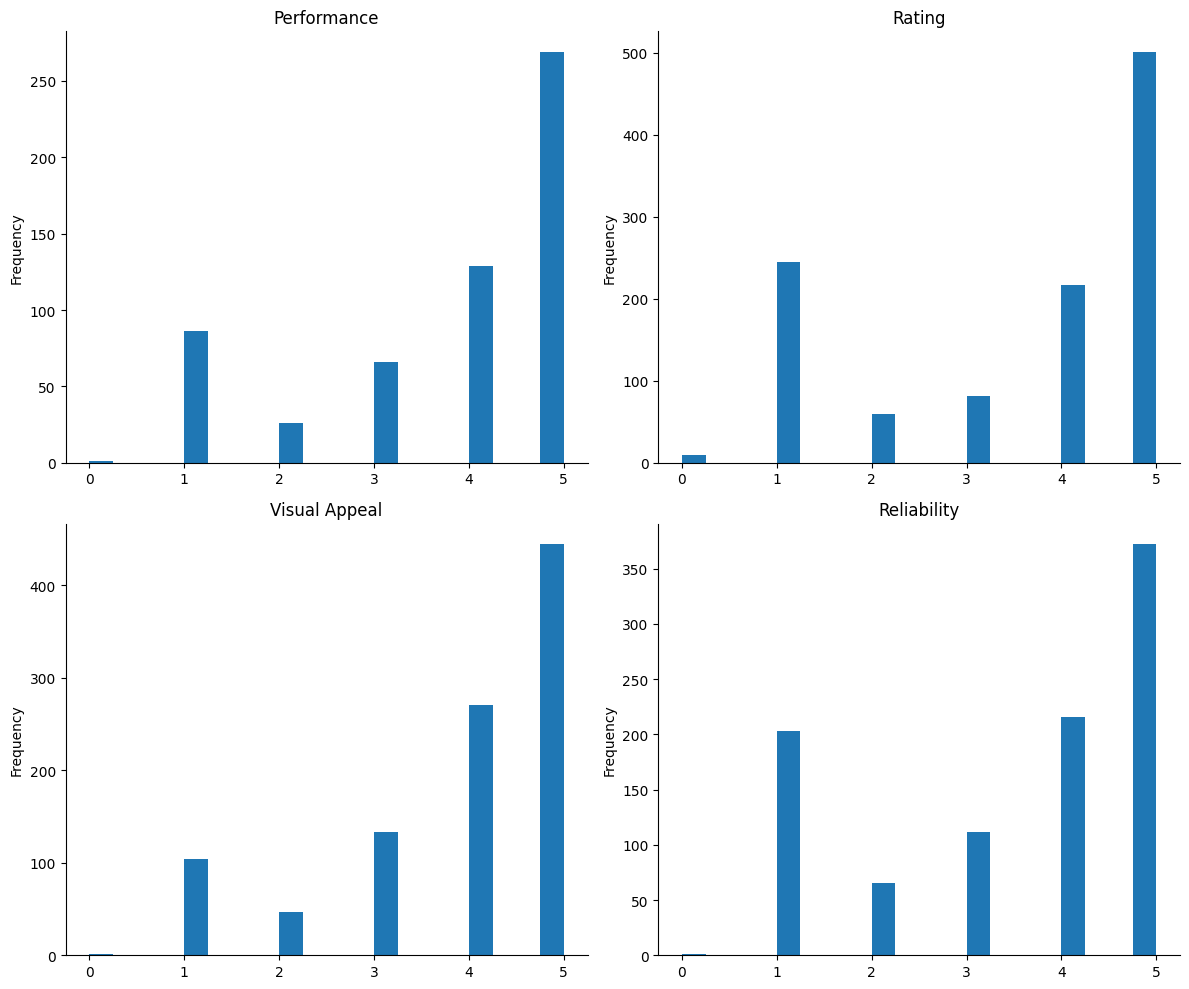

In [27]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms
data['Performance'].plot(kind='hist', bins=20, title='Performance', ax=axs[0, 0])
axs[0, 0].spines[['top', 'right',]].set_visible(False)

data['rating'].plot(kind='hist', bins=20, title='Rating', ax=axs[0, 1])
axs[0, 1].spines[['top', 'right',]].set_visible(False)

data['Visual Appeal'].plot(kind='hist', bins=20, title='Visual Appeal', ax=axs[1, 0])
axs[1, 0].spines[['top', 'right',]].set_visible(False)

data['Reliability'].plot(kind='hist', bins=20, title='Reliability', ax=axs[1, 1])
axs[1, 1].spines[['top', 'right',]].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

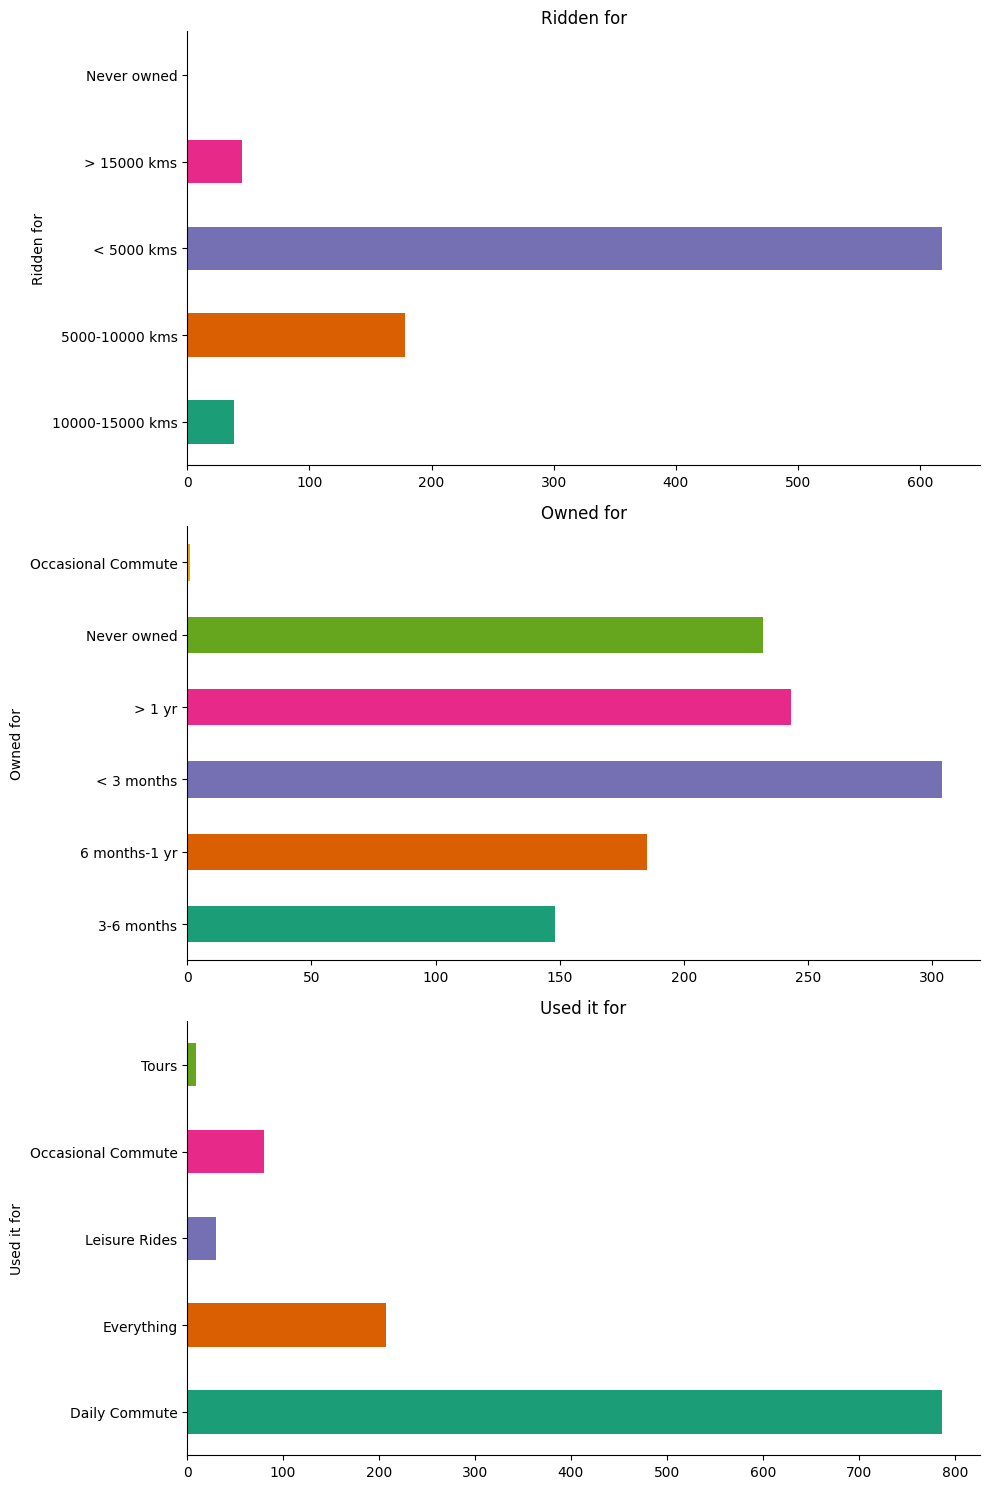

In [63]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for 'Ridden for'
data.groupby('Ridden for').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axes[0])
axes[0].set_title('Ridden for')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot for 'Owned for'
data.groupby('Owned for').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axes[1])
axes[1].set_title('Owned for')
axes[1].spines[['top', 'right']].set_visible(False)

# Plot for 'Used it for'
data.groupby('Used it for').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axes[2])
axes[2].set_title('Used it for')
axes[2].spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

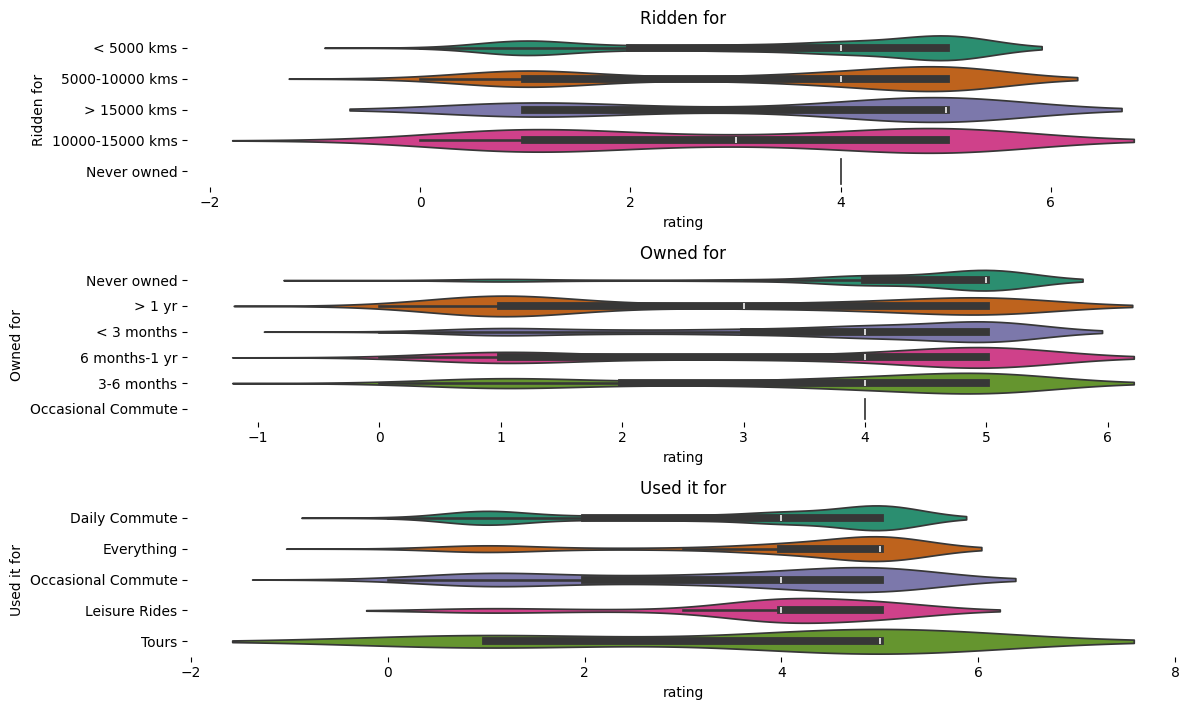

In [67]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 1.2 * len(data['Ridden for'].unique())))

# Plot for 'Ridden for'
sns.violinplot(data=data, x='Rating', y='Ridden for', inner='box', palette='Dark2', ax=axes[0])
axes[0].set_title('Ridden for')
sns.despine(ax=axes[0], top=True, right=True, bottom=True, left=True)

# Plot for 'Owned for'
sns.violinplot(data=data, x='Rating', y='Owned for', inner='box', palette='Dark2', ax=axes[1])
axes[1].set_title('Owned for')
sns.despine(ax=axes[1], top=True, right=True, bottom=True, left=True)

# Plot for 'Used it for'
sns.violinplot(data=data, x='Rating', y='Used it for', inner='box', palette='Dark2', ax=axes[2])
axes[2].set_title('Used it for')
sns.despine(ax=axes[2], top=True, right=True, bottom=True, left=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Training and Testing

In [30]:
# Train dataset
train_reviews=data.review[:1000]
train_rating=data.rating[:1000]

# Test dataset
test_reviews=data.review[1000:]
test_rating=data.rating[1000:]

print(train_reviews.shape,train_rating.shape)
print(test_reviews.shape,test_rating.shape)

(1000,) (1000,)
(113,) (113,)


### NLP Techniques

In [31]:
# Text Normalization

# Tokenization of text
tokenizer=ToktokTokenizer()

# Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [32]:
# Removing html strips and noise text

# Removing the HTML tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing text within square brackets
def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

# Removing noisy text
def denoise_text(text):
    if isinstance(text, str):
        text = strip_html(text)  # Remove HTML tags
        text = remove_between_square_brackets(text)  # Remove text within square brackets
        return text
    else:
        return str(text)

# Apply denoising function to the 'review' column
data['review'] = data['review'].apply(denoise_text)

In [33]:
# Removing Special Characters

# Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [34]:
# Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

# Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

In [35]:
# Removing stopwords

# Set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

# Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'itself', "hasn't", "you're", 'will', 'herself', 'both', 'haven', 'yourselves', 'can', 'should', 'such', 'ma', 'won', 'yourself', "mightn't", 'his', 'they', 'our', "should've", "shan't", 'a', 'do', 'you', 'here', 'an', 'why', 've', 'were', 'what', 'below', 'her', "that'll", 'does', 'aren', 'are', 'off', 'some', 'too', 'mightn', 'against', 'up', "needn't", 'it', 'after', "hadn't", 'because', 'y', 'am', 'hasn', 'weren', 'ourselves', 'any', 'own', 'hadn', "shouldn't", "haven't", 'is', "wouldn't", 'about', 'themselves', 'the', "couldn't", "wasn't", 'hers', 'which', 'with', 'there', 'just', 'him', 'been', 'nor', 'when', 'i', 'them', 'this', 'down', 'not', 'll', 'in', 'very', 'only', 's', "don't", 'of', 'mustn', 'himself', 'for', 'ain', 're', "you'll", 'again', "mustn't", 'than', 'we', 'then', 'most', 't', "didn't", 'while', 'over', 'out', 'few', 'shouldn', 'has', 'ours', 'whom', 'wouldn', 'from', 'to', 'who', 'their', 'further', 'no', "doesn't", 'he', 'more', 'that', 'd', 'or', 'don', 'eac

In [39]:
# Normalized train reviews
norm_train_reviews=data.review[:1000]
norm_train_reviews[0]

# # Convert dataframe to string
# norm_train_string=norm_train_reviews.to_string()

# # Spelling correction using Textblob
# norm_train_spelling=TextBlob(norm_train_string)
# norm_train_spelling.correct()

# # Tokenization using Textblob
# norm_train_words=norm_train_spelling.words
# norm_train_words

'check bike capac 150 km 1 full charg given onli 80 hell want pay 1 lakh 80 km dont need max speed 70 km 40 kmhr enough better safeti mani accid need happen worst experi expect say felt cheat'

In [40]:
# Normalized test reviews
norm_test_reviews=data.review[1000:]
norm_test_reviews[1050]

# # Convert dataframe to string
# norm_test_string=norm_test_reviews.to_string()

# # # Spelling correction using Textblob
# norm_test_spelling=TextBlob(norm_test_string)
# print(norm_test_spelling.correct())

# # # Tokenization using Textblob
# norm_test_words=norm_test_spelling.words
# norm_test_words

'con found electr fuel type major part countri cover much electr make thi variant ride fuel type like cng petrol diesel electr thi model becam biggest blockbust car industri make sure option like electr petrol electr cng electr diesel'

### Bag of Words Model (BoW)

In [41]:
# Bag of words model is used to convert text documents to numerical vectors or bag of words.
# Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
# Transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

vocab=cv.get_feature_names()

BOW_cv_train: (1000, 67730)
BOW_cv_test: (113, 67730)


### Term Frequency-Inverse Document Frequency Model (TFIDF)

In [42]:
# Tfidf is used to convert text documents to matrix of tfidf features.
# Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
# Transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)

# Transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (1000, 67730)
Tfidf_test: (113, 67730)


In [43]:
rating_data=data['rating']

In [44]:
# Spliting the sentiment data
train_rating=rating_data[:1000]
test_rating=rating_data[1000:]
print(train_rating)
print(test_rating)

0      1
1      1
2      3
3      1
4      1
      ..
995    5
996    5
997    4
998    5
999    5
Name: rating, Length: 1000, dtype: int64
1000    5
1001    5
1002    5
1003    5
1004    3
       ..
1108    4
1109    5
1110    5
1111    5
1112    5
Name: rating, Length: 113, dtype: int64


### ML Models

####*Logistic Regression*

In [45]:
# Modelling the dataset using Logistic Regression for bag of words and tfidf features
# Training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_rating)
print(lr_bow)

# Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_rating)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [46]:
# Logistic regression model performane on test dataset
# Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

# Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5]


In [47]:
# Accuracy score for bag of words
lr_bow_score=accuracy_score(test_rating,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

# Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_rating,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7256637168141593
lr_tfidf_score : 0.7256637168141593


In [49]:
# Classification report for bag of words
lr_bow_report=classification_report(test_rating,lr_bow_predict,target_names=['0','1','2','3','4','5'])
print(lr_bow_report)

# Classification report for tfidf features
lr_tfidf_report=classification_report(test_rating,lr_tfidf_predict,target_names=['1','2','3','4','5'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.50      0.08      0.13        13
           5       0.74      0.99      0.85        82

    accuracy                           0.73       113
   macro avg       0.21      0.18      0.16       113
weighted avg       0.60      0.73      0.63       113

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        13
           5       0.73      1.00      0.84        82

    accuracy                           0.73       113
   macro avg       0.15      0.20      0.17       113
weighted avg       0.53

#### *Linear Support Vector Machine*

In [50]:
# Training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

# Fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_rating)
print(svm_bow)

# Fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_rating)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [51]:
# Training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

# Fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_rating)
print(svm_bow)

# Fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_rating)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [52]:
# Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

# Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 4 5 5 4 5 5 3 5 1 5 5 5 5 5 1 5 5 5 5 4 5 2
 5 5 3 5 4 5 5 1 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 4 3 5 4 5 5 5 5 5 5 5 5 5 5 5 1 5 5 4 5 4 5 1 5 5 4 4 5 5 4 1 5
 5 5]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 4 5 1 5 5 5 5 5 5 5 1 5
 5 5]


In [53]:
svm_bow_score=accuracy_score(test_rating,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

# Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_rating,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.6371681415929203
svm_tfidf_score : 0.6991150442477876


In [54]:
# Classification report for bag of words
svm_bow_report=classification_report(test_rating,svm_bow_predict,target_names=['0','1','2','3','4','5'])
print(svm_bow_report)

# Classification report for tfidf features
svm_tfidf_report=classification_report(test_rating,svm_tfidf_predict,target_names=['0','1','2','3','4','5'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.31      0.31      0.31        13
           5       0.77      0.83      0.80        82

    accuracy                           0.64       113
   macro avg       0.18      0.19      0.18       113
weighted avg       0.60      0.64      0.62       113

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.25      0.08      0.12        13
           5       0.73      0.95      0.83        82

    accuracy                           0.70       113
   macro avg       0.16

#### *Naive Bayes*

In [55]:
# Training the model
mnb=MultinomialNB()

# Fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_rating)
print(mnb_bow)

# Fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_rating)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [56]:
# Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

# Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 4 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5]


In [57]:
# Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_rating,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

# Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_rating,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7168141592920354
mnb_tfidf_score : 0.7256637168141593


In [58]:
# Classification report for bag of words
mnb_bow_report=classification_report(test_rating,mnb_bow_predict,target_names=['0','1','2','3','4','5'])
print(mnb_bow_report)

# Classification report for tfidf features
mnb_tfidf_report=classification_report(test_rating,mnb_tfidf_predict,target_names=['1','2','3','4','5'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.33      0.08      0.12        13
           5       0.74      0.98      0.84        82

    accuracy                           0.72       113
   macro avg       0.18      0.18      0.16       113
weighted avg       0.58      0.72      0.63       113

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        13
           5       0.73      1.00      0.84        82

    accuracy                           0.73       113
   macro avg       0.15      0.20      0.17       113
weighted avg       0.53

#### Visual Representation of All 3 Models

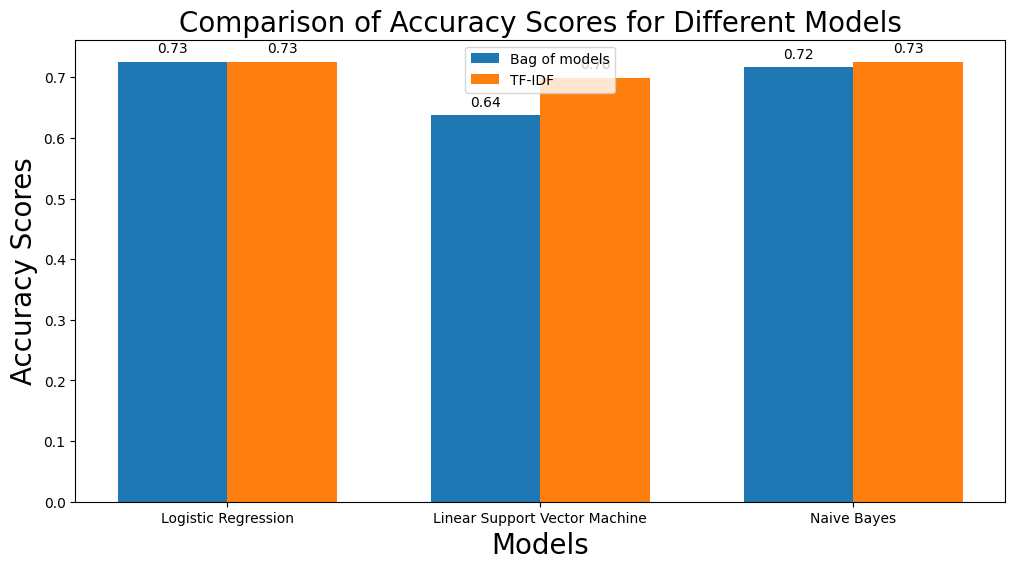

In [59]:
# Visual representation of comparision of the three models
fig = plt.figure(figsize=(12,6))
models = ['Logistic Regression', 'Linear Support Vector Machine', 'Naive Bayes']
accuracy_scores_bow = [lr_bow_score, svm_bow_score, mnb_bow_score]  # Accuracy scores for bag of words
accuracy_scores_tfidf = [lr_tfidf_score, svm_tfidf_score, mnb_tfidf_score]  # Accuracy scores for tfidf

# Set up positions for bars on X-axis
bar_width = 0.35

# Set up positions for the bar groups
bar_positions_run1 = np.arange(len(models))
bar_positions_run2 = bar_positions_run1 + bar_width

# Create the grouped bar plot
plt.bar(bar_positions_run1, accuracy_scores_bow, width=bar_width, label='Bag of models')
plt.bar(bar_positions_run2, accuracy_scores_tfidf, width=bar_width, label='TF-IDF')

# Adding annotations for the accuracy scores
for i, (score1, score2) in enumerate(zip(accuracy_scores_bow, accuracy_scores_tfidf)):
    plt.text(bar_positions_run1[i], score1 + 0.01, f'{score1:.2f}', ha='center', va='bottom')
    plt.text(bar_positions_run2[i], score2 + 0.01, f'{score2:.2f}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Models', fontsize=20)
plt.ylabel('Accuracy Scores', fontsize=20)
plt.title('Comparison of Accuracy Scores for Different Models', fontsize=20)
plt.xticks(bar_positions_run1 + bar_width / 2, models)
plt.legend()

# Showing the plot
plt.show()

### Word Cloud For Positive Review Words

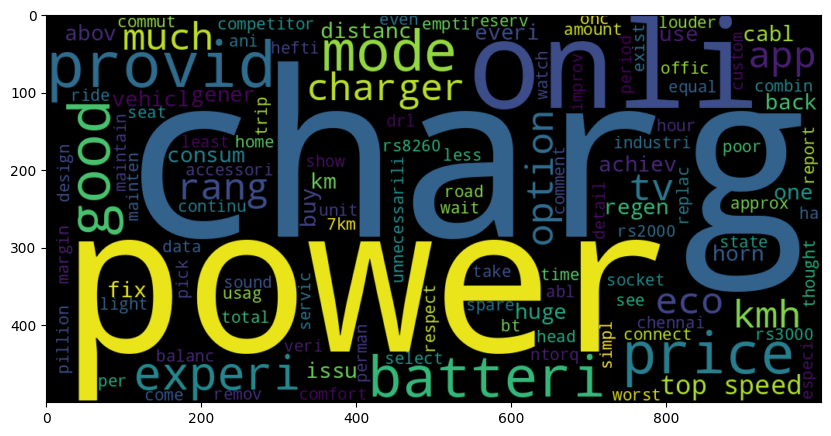

In [68]:
# Set up the figure size
plt.figure(figsize=(10, 10))

# Extract the text for word cloud generation (assuming 'norm_train_reviews' is a list containing preprocessed text data)
positive_text = norm_train_reviews[8]

# Create a WordCloud object with specified parameters
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)

# Generate word cloud from the text
positive_words = WC.generate(positive_text)

# Display the word cloud
plt.imshow(positive_words, interpolation='bilinear')
plt.show()

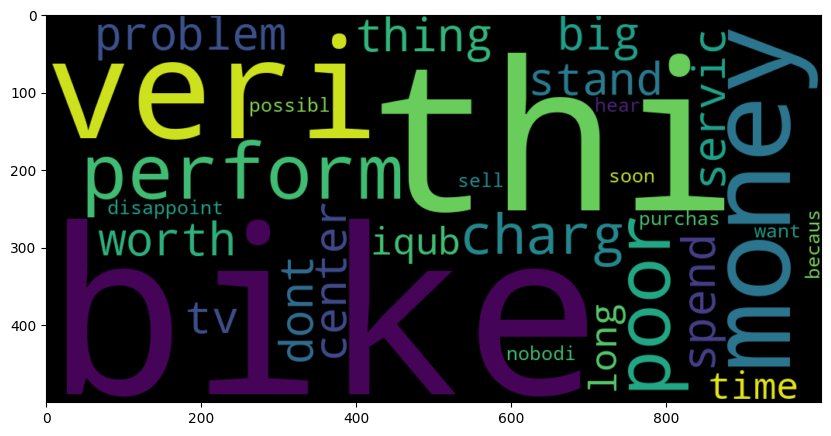

In [69]:
# Set up the figure size
plt.figure(figsize=(10, 10))

# Extract the text for negative reviews for word cloud generation
negative_text = norm_train_reviews[1]

# Create a WordCloud object with specified parameters
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)

# Generate word cloud from the negative text
negative_words = WC.generate(negative_text)

# Display the word cloud
plt.imshow(negative_words, interpolation='bilinear')
plt.show()